In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import itertools as it

from msmsrt_scorer.experiments.EA_Massbank.plot_and_table_utils import IDIR, IDIR_METFRAG, _label_p, load_results

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Results for the EA (Massbank) Dataset

Summary of the top-k accuracy for the EA (Massbank) dataset.

In [11]:
param_selection_measure = "topk_auc"
eval_method = "casmi"

## Table 3 in the Paper  

Performance of using MS + RT data compared to only using MS data. 

- **our**: Sigmoid as edge potential; k parameter using Platt's method; D parameter using grid-search; Number of trees 32; Max-marginal
- **MetFrag 2.2**: MetFrag 2.2 combines the MS fragmenter scores with retention time predictions; D parameter using grdi-search
- **Chain-graph**: Hinge-Sigmoid as edge potential, k and D parameter using grid-search; One chain graph like tree

### Positive Spectra

In [10]:
# Dataset settings
ion_mode, max_n_ms2 = "positive", 100

# Input directories
idir_our = IDIR(tree_method="random", n_random_trees=32, ion_mode=ion_mode, D_value_method=None,
                base_dir="results__TFG__platt", mode="application", param_selection_measure=param_selection_measure, make_order_prob="sigmoid",
                norm_scores="none", margin_type="max")

idir_metfrag22 = IDIR_METFRAG(ion_mode=ion_mode, base_dir="results__MetFrag22", mode="application",
                              param_selection_measure=param_selection_measure)

idir_chaingraph = IDIR(tree_method="chain", ion_mode=ion_mode, D_value_method=None,
                       base_dir="results__TFG__gridsearch", mode="application",
                       param_selection_measure=param_selection_measure, make_order_prob="hinge_sigmoid",
                       norm_scores="none", margin_type="max")

results = pd.concat([load_results(idir_our, "MS + RT (our)", max_n_ms2, n_samples=100,
                                  method=eval_method)[0],
                     load_results(idir_metfrag22, "MS + RT (MetFrag 2.2)", max_n_ms2, n_samples=100,
                                  method=eval_method)[0],
                     load_results(idir_chaingraph, "MS + RT (Chain-graph)", max_n_ms2, n_samples=100,
                                  method=eval_method)[0]], 
                     sort=False) \
    .drop_duplicates()
results.head()

assert (results.loc[results.Method == "Only MS"].shape[0] == 100)
assert (results.loc[results.Method == "MS + RT (our)"].shape[0] == 100)
assert (results.loc[results.Method == "MS + RT (MetFrag 2.2)"].shape[0] == 100)
assert (results.loc[results.Method == "MS + RT (Chain-graph)"].shape[0] == 100)

P_TEST = "wilcoxon_oneside"



results.drop(columns=["sample"]) \
    .groupby("Method") \
    .agg({"Top-1": lambda x: _label_p(x, 1, P_TEST, results),
          "Top-5": lambda x: _label_p(x, 5, P_TEST, results), 
          "Top-10": lambda x: _label_p(x, 10, P_TEST, results), 
          "Top-20": lambda x: _label_p(x, 20, P_TEST, results)}) \
    .reset_index() 

,Method,Top-1,Top-5,Top-10,Top-20
0,MS + RT (Chain-graph),23.9 (***),59.2,70.1,79.1 (***)
1,MS + RT (MetFrag 2.2),24.0 (***),59.0,69.5,77.1
2,MS + RT (our),27.1 (***),61.5 (***),72.9 (***),80.5 (***)
3,Only MS,21.2,59.0,69.7,77.6


### Negative Spectra

In [13]:
# Dataset settings
ion_mode, max_n_ms2 = "negative", 65

# Input directories
idir_our = IDIR(tree_method="random", n_random_trees=32, ion_mode=ion_mode, D_value_method=None,
                base_dir="results__TFG__platt", mode="application", param_selection_measure=param_selection_measure, 
                make_order_prob="sigmoid", norm_scores="none", margin_type="max")

idir_metfrag22 = IDIR_METFRAG(ion_mode=ion_mode, base_dir="results__MetFrag22", mode="application",
                              param_selection_measure=param_selection_measure)

idir_chaingraph = IDIR(tree_method="chain", ion_mode=ion_mode, D_value_method=None,
                       base_dir="results__TFG__gridsearch", mode="application",
                       param_selection_measure=param_selection_measure, make_order_prob="hinge_sigmoid",
                       norm_scores="none", margin_type="max")

results = pd.concat([load_results(idir_our, "MS + RT (our)", max_n_ms2, n_samples=50,
                                  method=eval_method)[0],
                     load_results(idir_metfrag22, "MS + RT (MetFrag 2.2)", max_n_ms2, n_samples=50,
                                  method=eval_method)[0],
                     load_results(idir_chaingraph, "MS + RT (Chain-graph)", max_n_ms2, n_samples=50,
                                  method=eval_method)[0]], 
                     sort=False) \
    .drop_duplicates()
results.head()

assert (results.loc[results.Method == "Only MS"].shape[0] == 50)
assert (results.loc[results.Method == "MS + RT (our)"].shape[0] == 50)
assert (results.loc[results.Method == "MS + RT (MetFrag 2.2)"].shape[0] == 50)
assert (results.loc[results.Method == "MS + RT (Chain-graph)"].shape[0] == 50)

P_TEST = "wilcoxon_oneside"



results.drop(columns=["sample"]) \
    .groupby("Method") \
    .agg({"Top-1": lambda x: _label_p(x, 1, P_TEST, results),
          "Top-5": lambda x: _label_p(x, 5, P_TEST, results), 
          "Top-10": lambda x: _label_p(x, 10, P_TEST, results), 
          "Top-20": lambda x: _label_p(x, 20, P_TEST, results)}) \
    .reset_index() 

,Method,Top-1,Top-5,Top-10,Top-20
0,MS + RT (Chain-graph),27.2 (***),59.5 (***),72.4 (***),81.8 (***)
1,MS + RT (MetFrag 2.2),30.2 (***),59.2 (***),73.6 (***),84.4 (***)
2,MS + RT (our),29.1 (***),62.3 (***),73.7 (***),83.1 (***)
3,Only MS,22.8,57.6,69.5,78.5


## Performance for different Numbers of Random Trees ($L$)

In Figure 2 of the manuscript we show how the number of spanning trees influence the performence of our score integration approauch averaged over all ionization modes and datasets. Here, we show the results for the EA (Massbank) dataset separetly for positive and negative ionization. 

In [16]:
results = pd.DataFrame()

for i, (L, m_type) in enumerate(it.product([1, 2, 4, 8, 16, 32, 64], ["max", "sum"])):
    # Load positive data
    ion_mode, max_n_ms2 = "positive", 100
    
    idir_our = IDIR(tree_method="random", n_random_trees=L, ion_mode=ion_mode, D_value_method=None,
                    base_dir="results__TFG__platt", mode="application",
                    param_selection_measure=param_selection_measure, make_order_prob="sigmoid",
                    norm_scores="none", margin_type=m_type)
    
    _results_pos = load_results(idir_our, "MS + RT (%s, L = %d, %s)" % (ion_mode, L, m_type), max_n_ms2, 
                                method=eval_method, label_only_ms="Only MS (%s)" % ion_mode, n_samples=100, 
                                load_baseline=(i == 0))[0]
    _results_pos["L"] = L
    _results_pos["Ionization"] = ion_mode
    _results_pos["Margin"] = m_type
    
    # Load negative data
    ion_mode, max_n_ms2 = "negative", 65
    
    idir_our = IDIR(tree_method="random", n_random_trees=L, ion_mode=ion_mode, D_value_method=None,
                    base_dir="results__TFG__platt", mode="application",
                    param_selection_measure=param_selection_measure, make_order_prob="sigmoid",
                    norm_scores="none", margin_type=m_type)
    
    _results_neg = load_results(idir_our, "MS + RT (%s, L = %d, %s)" % (ion_mode, L, m_type), max_n_ms2, 
                                method=eval_method, label_only_ms="Only MS (%s)" % ion_mode, n_samples=50,
                                load_baseline=(i == 0))[0]
    _results_neg["L"] = L
    _results_neg["Ionization"] = ion_mode
    _results_neg["Margin"] = m_type
    
    results = pd.concat([results, _results_pos, _results_neg])
    
results = results.drop_duplicates()

# Just ensure that droping the repeatedly added basline has not broke any other stuff
for L, m_type in it.product([1, 2, 4, 8, 16, 32, 64], ["max", "sum"]):
    assert (results.loc[results.Method == "MS + RT (positive, L = %d, %s)" % (L, m_type)].shape[0] == 100)
    assert (results.loc[results.Method == "MS + RT (negative, L = %d, %s)" % (L, m_type)].shape[0] == 50)
assert (results.loc[results.Method == "Only MS (positive)"].shape[0] == 100)
assert (results.loc[results.Method == "Only MS (negative)"].shape[0] == 50)

results.loc[results.Method == "Only MS (positive)", "L"] = None
results.loc[results.Method == "Only MS (negative)", "L"] = None

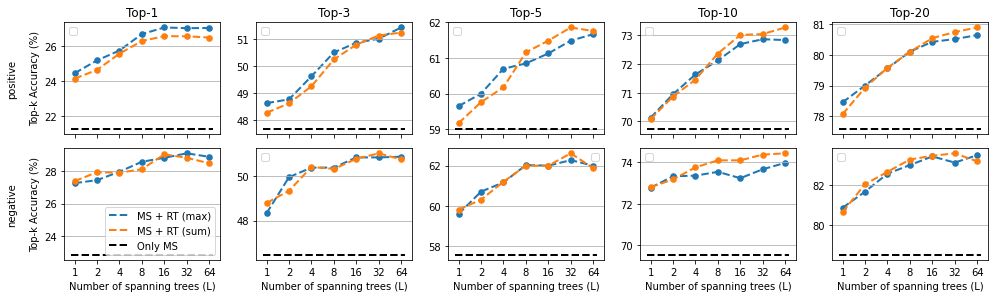

In [17]:
fig, axrr = plt.subplots(2, 5, figsize=(14, 4.25))

_results = results.drop("sample", axis=1).melt(id_vars=["Ionization", "L", "Method", "Margin"], 
                                               var_name="Top-k", value_name="Top-k Accuracy (%)")

for i, (ionm, topk) in enumerate(it.product(["positive", "negative"], ["Top-%d" % k for k in [1, 3, 5, 10, 20]])):
    r, c = np.unravel_index(i, shape=axrr.shape)
    
    ax = axrr[r, c] 
    _perfl = sns.pointplot(data=_results.loc[(_results.Ionization==ionm) & 
                                             (_results["Top-k"] == topk) & 
                                             (_results.Method != "Only MS (%s)" % ionm)], 
                           x="L", y="Top-k Accuracy (%)", hue="Margin", ax=ax, errwidth=1.75, capsize=0.25, linestyles="--",
                           scale=0.75, ci=None)
    
    _hline = ax.hlines(_results.loc[(_results.Ionization==ionm) & 
                                    (_results["Top-k"] == topk) & 
                                    (_results.Method == "Only MS (%s)" % ionm)]["Top-k Accuracy (%)"].mean(),
                       -0.15, 6.15, linestyle="--", linewidth=2)
    
    if (r == 1) and (c == 0):
        ax.legend([_perfl.get_lines()[0], _perfl.get_lines()[1], _hline], ["MS + RT (max)", "MS + RT (sum)", "Only MS"], 
                  loc="lower right")
    else:
        ax.legend([])
    
    if c == 0:
        ax.set_ylabel("%s\n\nTop-k Accuracy (%%)" % ionm)
        
    else:
        ax.set_ylabel("")
    if r == 0:
        ax.set_xlabel("")
        ax.set_title("%s" % topk)
        ax.set_xticklabels([])
    else:
        ax.set_xlabel("Number of spanning trees (L)")
        ax.set_xticklabels([1, 2, 4, 8, 16, 32, 64])
        
    ax.grid(axis="y")
    
plt.tight_layout()